BIG DATA IN BUSINESS AND INDUSTRY, PRACTICAL WORK\
Taru Haimi, 0565878\
Joona Ylijoki, xxxxxxx

TASK: Create ML model to forecast user's next exercise type, time and, possibly, duration

In [1]:
#########################################
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pa_functions as pafuns

Loading data from json files into one dataframe.\
Source code: READ_workoutsToMoodle.py 

In [2]:
folderpath = r"C:\Users\taruh\Qsync\LUT\Maisterikurssit\Big Data in Business and Industry\PRACTICAL WORK\WorkoutData_2017to2020"
data = pd.DataFrame()
for file in os.listdir(folderpath):
    newdf = pafuns.read_file_to_df(os.path.join(folderpath, file))
    data = pd.concat([data, newdf], ignore_index=True)
data.reset_index(drop=True, inplace = True)

EXPLORATORY DATA ANALYSIS & DATA PREPROCESSING

- Missing values handling?
- Encoding categorical variables
- Scaling 

1) Finding out all different types of sport

In [3]:
sporttypes = data["sport"].unique()
print(sporttypes)
print("Number of different sport types: ", len(data["sport"].unique()))

['WALKING' 'WEIGHT_TRAINING' 'RUNNING' 'SKIING_CROSS_COUNTRY' 'SWIMMING'
 'BADMINTON' 'ROLLER_SKATING' 'FITNESS_WALKING' 'CYCLING_SPORT' 'CROSSFIT'
 'RUNNING_CANICROSS' 'ICE_SKATING' 'BEACH_VOLLEY' 'CYCLING_TRANSPORTATION'
 'STAIR_CLIMBING' 'CROSS_TRAINING' 'STRETCHING']
Number of different sport types:  17


2. Exploring average durations for each starting hour by sport type.

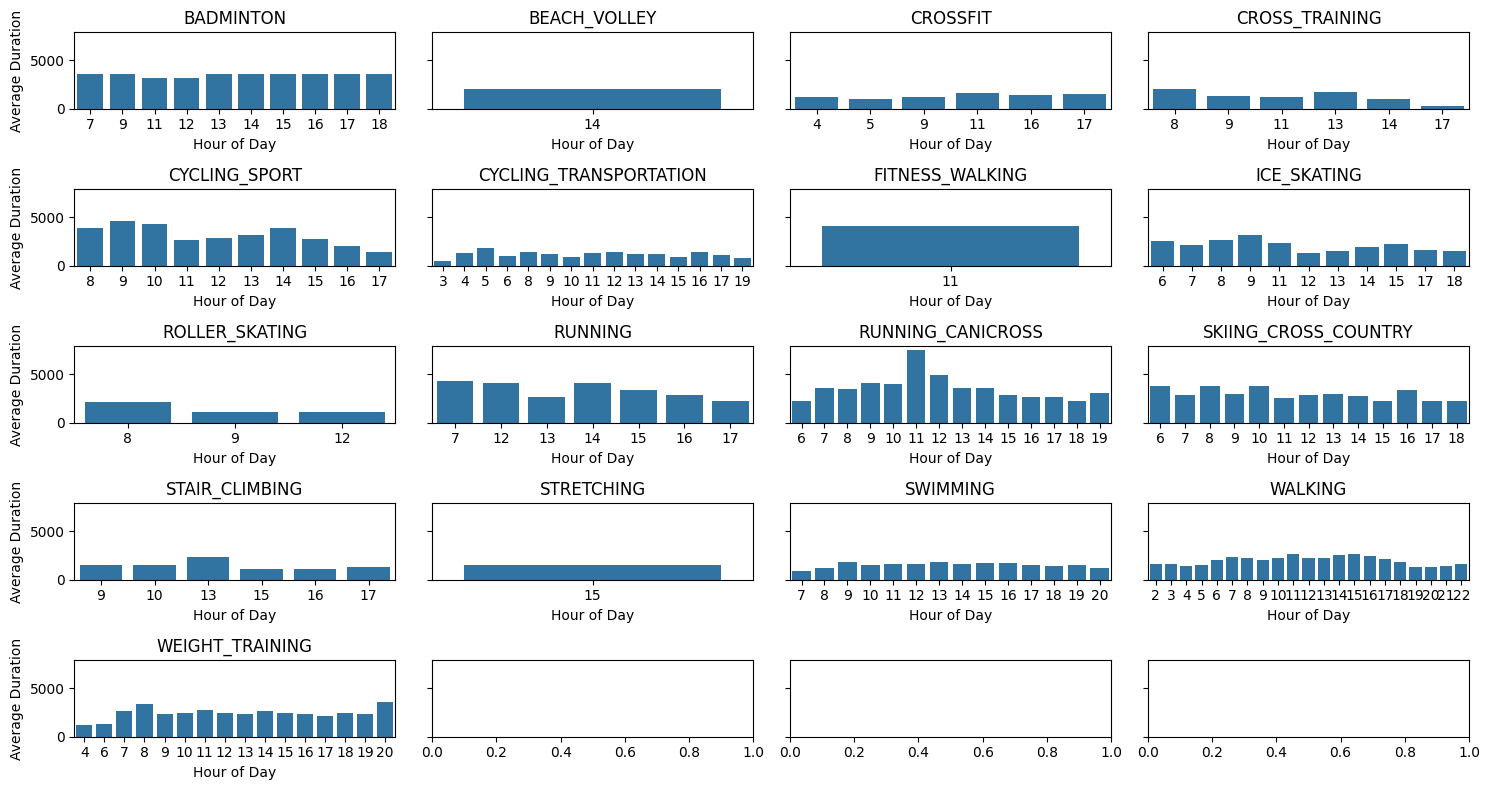

In [4]:
# Convert 'timestamp' column to datetime
data['start_time'] = pd.to_datetime(data['start_time'])

# Extract the hour from the timestamp
data['start_hour'] = data['start_time'].dt.hour

# Calculate the average duration for each hour and sport type
# hourlydata = data.copy()
mean_durations = data.groupby(['sport', 'start_hour'])['duration_s'].mean().reset_index()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 8), sharey=True)

# Flatten the 2D array of subplots
axes = axes.flatten()

# Iterate over sport types
for i, (sport, hourlydata) in enumerate(mean_durations.groupby('sport')):
    sns.barplot(x='start_hour', y='duration_s', data=hourlydata, ax=axes[i])
    axes[i].set_title(sport)
    axes[i].set_xlabel('Hour of Day')
    axes[i].set_ylabel('Average Duration')

# Adjust layout
plt.tight_layout()
plt.show()

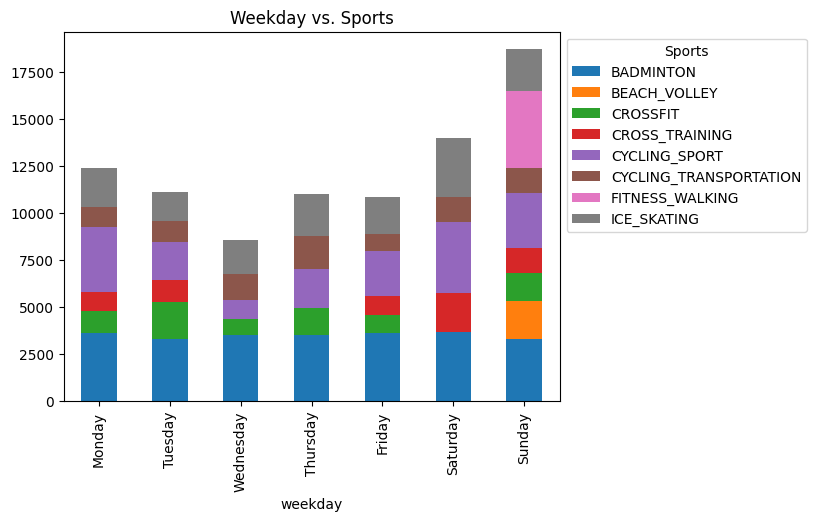

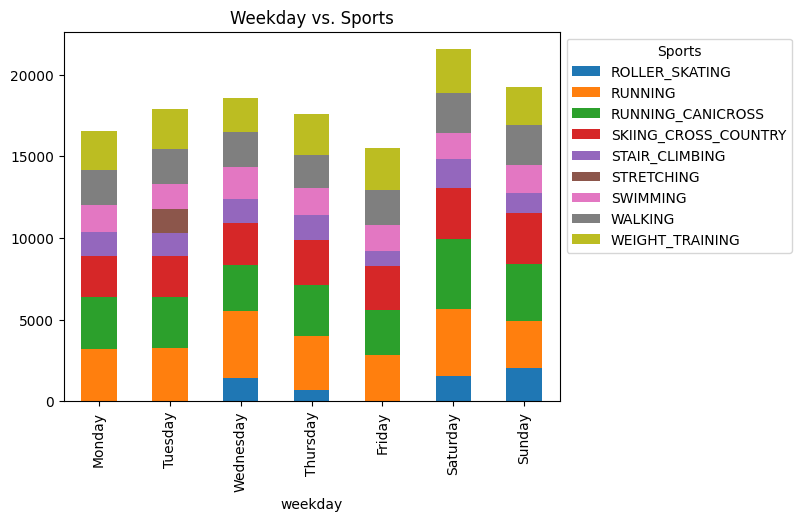

In [5]:
# Extract the weekday from the timestamp
data['weekday'] = data['start_time'].dt.weekday

# Calculate the average duration for each weekday and sport type
mean_durations = data.groupby(['sport', 'weekday'])['duration_s'].mean().reset_index()

# Pivot the data to have weekdays as columns
mean_durations_pivot = mean_durations.pivot(index='weekday', columns='sport', values='duration_s').reset_index()

# Plot the average duration per sport and  per weekday in two parts:
datapart1 =  mean_durations_pivot.iloc[:,list(range(0, 9))]
datapart2 = mean_durations_pivot.iloc[:, [0] + list(range(9, 18))]
pafuns.plot_weekday_data(datapart1)
pafuns.plot_weekday_data(datapart2)